In [1]:
import pandas as pd

In [2]:
mp = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\KNN\trainRF.csv')

In [3]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split


In [7]:
mp_train, mp_test = train_test_split(mp, test_size=.2)

In [8]:
mp_train_x = mp_train.iloc[:,0:-1]
mp_train_y = mp_train.iloc[:, -1]

mp_test_x = mp_test.iloc[:,0:-1]
mp_test_y = mp_test.iloc[:, -1]

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=12)

# By default n_neighbors which is nothing but K has value  5

In [26]:
knn.fit(mp_train_x, mp_train_y)

KNeighborsClassifier(n_neighbors=12)

In [27]:
pred_knn = knn.predict(mp_test_x)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [29]:
tab_knn =confusion_matrix(mp_test_y, pred_knn)
tab_knn

array([[100,   1,   0,   0],
       [  5,  88,   2,   0],
       [  0,   8,  96,   2],
       [  0,   0,   8,  90]], dtype=int64)

In [30]:
Accuracy = accuracy_score(mp_test_y, pred_knn)*100
Accuracy
# K = 12

93.5

In [23]:
tab_knn =confusion_matrix(mp_test_y, pred_knn)
tab_knn

array([[99,  2,  0,  0],
       [ 5, 89,  1,  0],
       [ 0,  7, 97,  2],
       [ 0,  0,  9, 89]], dtype=int64)

In [24]:
Accuracy = accuracy_score(mp_test_y, pred_knn)*100
Accuracy
# K = 10

93.5

In [14]:
tab_knn =confusion_matrix(mp_test_y, pred_knn)
tab_knn

array([[96,  5,  0,  0],
       [ 3, 88,  4,  0],
       [ 0,  6, 95,  5],
       [ 0,  0,  8, 90]], dtype=int64)

In [17]:
Accuracy = accuracy_score(mp_test_y, pred_knn)*100

In [18]:
Accuracy
# K = 5

92.25

In [ ]:
# Now we will change the value of K, which is n_neighbors

In [43]:
# I want to test the accuracy for value ok from 1 to 75
acc_list = []
for k in range (1,76):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(mp_train_x, mp_train_y)
    pred_knn = knn.predict(mp_test_x)
    Accuracy = accuracy_score(mp_test_y, pred_knn)*100
    acc_list.append(Accuracy)
    

In [44]:
import matplotlib.pyplot as plt

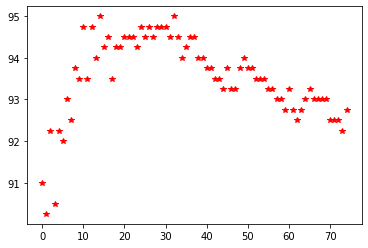

In [46]:
plt.plot(acc_list, '*', color = 'r')

In [47]:
# We can see accuracy is very less fluctuating between k =20 and k=40
# also, keeping in mind that accuracy is not compromised much
# so we will take k=30 as a standard value

In [48]:
acc_list = []
for k in range (1,200):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(mp_train_x, mp_train_y)
    pred_knn = knn.predict(mp_test_x)
    Accuracy = accuracy_score(mp_test_y, pred_knn)*100
    acc_list.append(Accuracy)

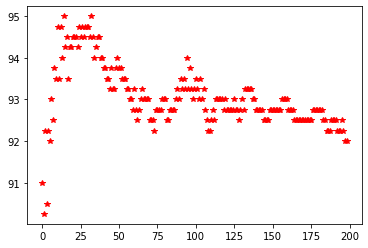

In [49]:
plt.plot(acc_list, '*', color = 'r')

In [50]:
# You can see that as we increase the value of k, the accuracy is decreasing

# Also, avoid taking low values of k for the model

# Taking high value of k, might increase the stability, but compromise your model Accuracy as well
# So, taking high values of k should not decrease the accuracy much